In [13]:
import os
print(os.path)

<module 'posixpath' from '/opt/anaconda3/lib/python3.9/posixpath.py'>


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.linear_model import LinearRegression,LassoCV,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score, \
                            precision_score,recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [15]:
#读取数据
train = pd.read_csv("//Users/hezheng/Downloads/ConsumerCredit/ConsumerCred-train.csv")
# 调整列
train = train.drop('id',axis=1)
train.rename(columns = {'SeriousDlqin2yrs':'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines':'RevolvingUtilizationOfUnsecuredLines', 'age':'age',
       'NumberOfTime30-59DaysPastDueNotWorse':'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio':'DebtRatio', 'MonthlyIncome':'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans':'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate':'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines':'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse':'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents':'NumberOfDependents'},inplace=True)
test = pd.read_csv("//Users/hezheng/Downloads/ConsumerCredit/ConsumerCred-test.csv",sep = ",")
test = test.drop('id',axis=1)
test.rename(columns = {'SeriousDlqin2yrs':'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines':'RevolvingUtilizationOfUnsecuredLines', 'age':'age',
       'NumberOfTime30-59DaysPastDueNotWorse':'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio':'DebtRatio', 'MonthlyIncome':'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans':'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate':'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines':'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse':'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents':'NumberOfDependents'},inplace=True)

In [16]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112500 entries, 0 to 112499
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      112500 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  112500 non-null  float64
 2   age                                   112500 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  112500 non-null  int64  
 4   DebtRatio                             112500 non-null  float64
 5   MonthlyIncome                         90169 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       112500 non-null  int64  
 7   NumberOfTimes90DaysLate               112500 non-null  int64  
 8   NumberRealEstateLoansOrLines          112500 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  112500 non-null  int64  
 10  NumberOfDependents                    109509 non-null  float64
dtype

In [17]:
print(train.head().T)

                                                0            1            2  \
SeriousDlqin2yrs                         1.000000     0.000000     0.000000   
RevolvingUtilizationOfUnsecuredLines     0.766127     0.957151     0.658180   
age                                     45.000000    40.000000    38.000000   
NumberOfTime30-59DaysPastDueNotWorse     2.000000     0.000000     1.000000   
DebtRatio                                0.802982     0.121876     0.085113   
MonthlyIncome                         9120.000000  2600.000000  3042.000000   
NumberOfOpenCreditLinesAndLoans         13.000000     4.000000     2.000000   
NumberOfTimes90DaysLate                  0.000000     0.000000     1.000000   
NumberRealEstateLoansOrLines             6.000000     0.000000     0.000000   
NumberOfTime60-89DaysPastDueNotWorse     0.000000     0.000000     0.000000   
NumberOfDependents                       2.000000     1.000000     0.000000   

                                               3   

In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,112500.0,0.067227,0.250415,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,112500.0,5.875869,216.049516,0.0,0.030293,0.153932,0.558363,29110.0
age,112500.0,52.318018,14.769059,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,112500.0,0.422809,4.225422,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,112500.0,350.538451,1536.092601,0.0,0.174611,0.366913,0.872048,220516.0
MonthlyIncome,90169.0,6651.952456,11147.828705,0.0,3400.000000,5400.000000,8250.000000,1794060.0
NumberOfOpenCreditLinesAndLoans,112500.0,8.463840,5.150094,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,112500.0,0.268124,4.202573,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,112500.0,1.019520,1.133609,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,112500.0,0.243120,4.188614,0.0,0.000000,0.000000,0.000000,98.0


In [19]:
print(train.SeriousDlqin2yrs.value_counts())

0    104937
1      7563
Name: SeriousDlqin2yrs, dtype: int64


In [8]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           22331
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2991
dtype: int64

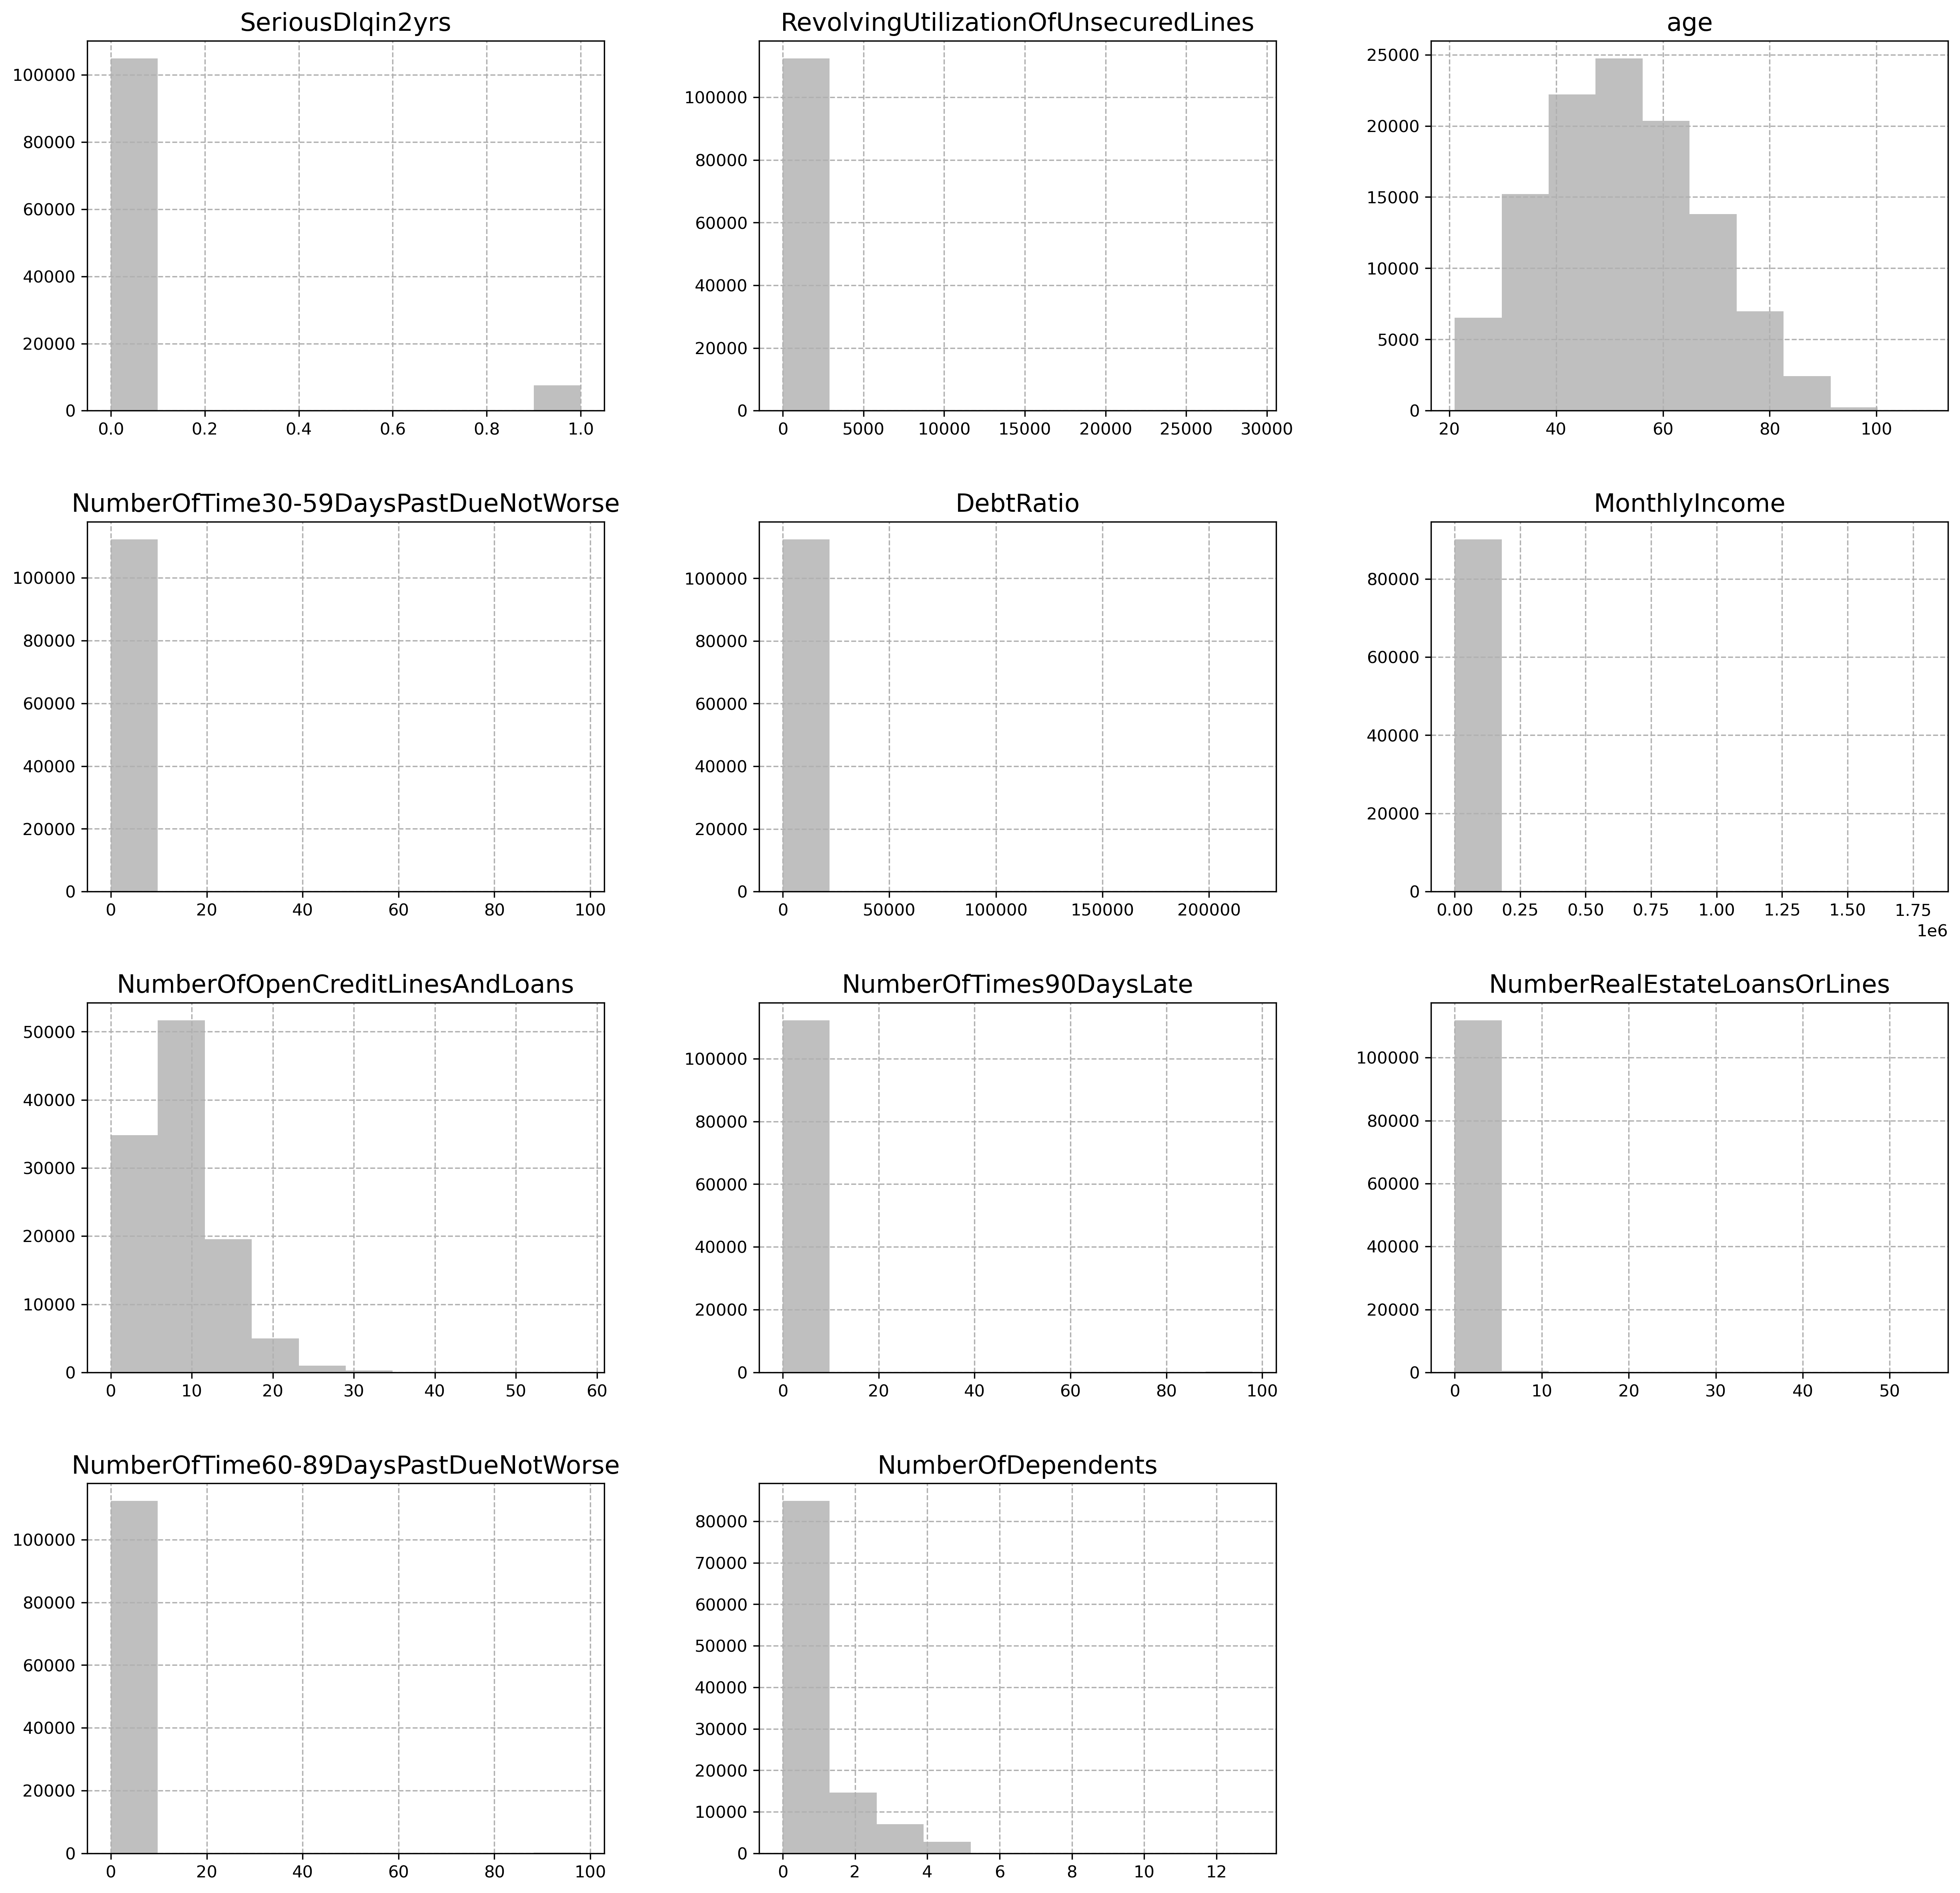

In [9]:
# 输出各字段分布情况图
# 大多数字段明显偏态，后续建模需考虑纠偏处理
plt.figure(figsize=(20,20),dpi=300)
plt.subplots_adjust(wspace =0.3, hspace =0.3)
for n,i in enumerate(train.columns):
    plt.subplot(4,3,n+1)
    plt.title(i,fontsize=15)
    plt.grid(linestyle='--')
    train[i].hist(color='grey',alpha=0.5)

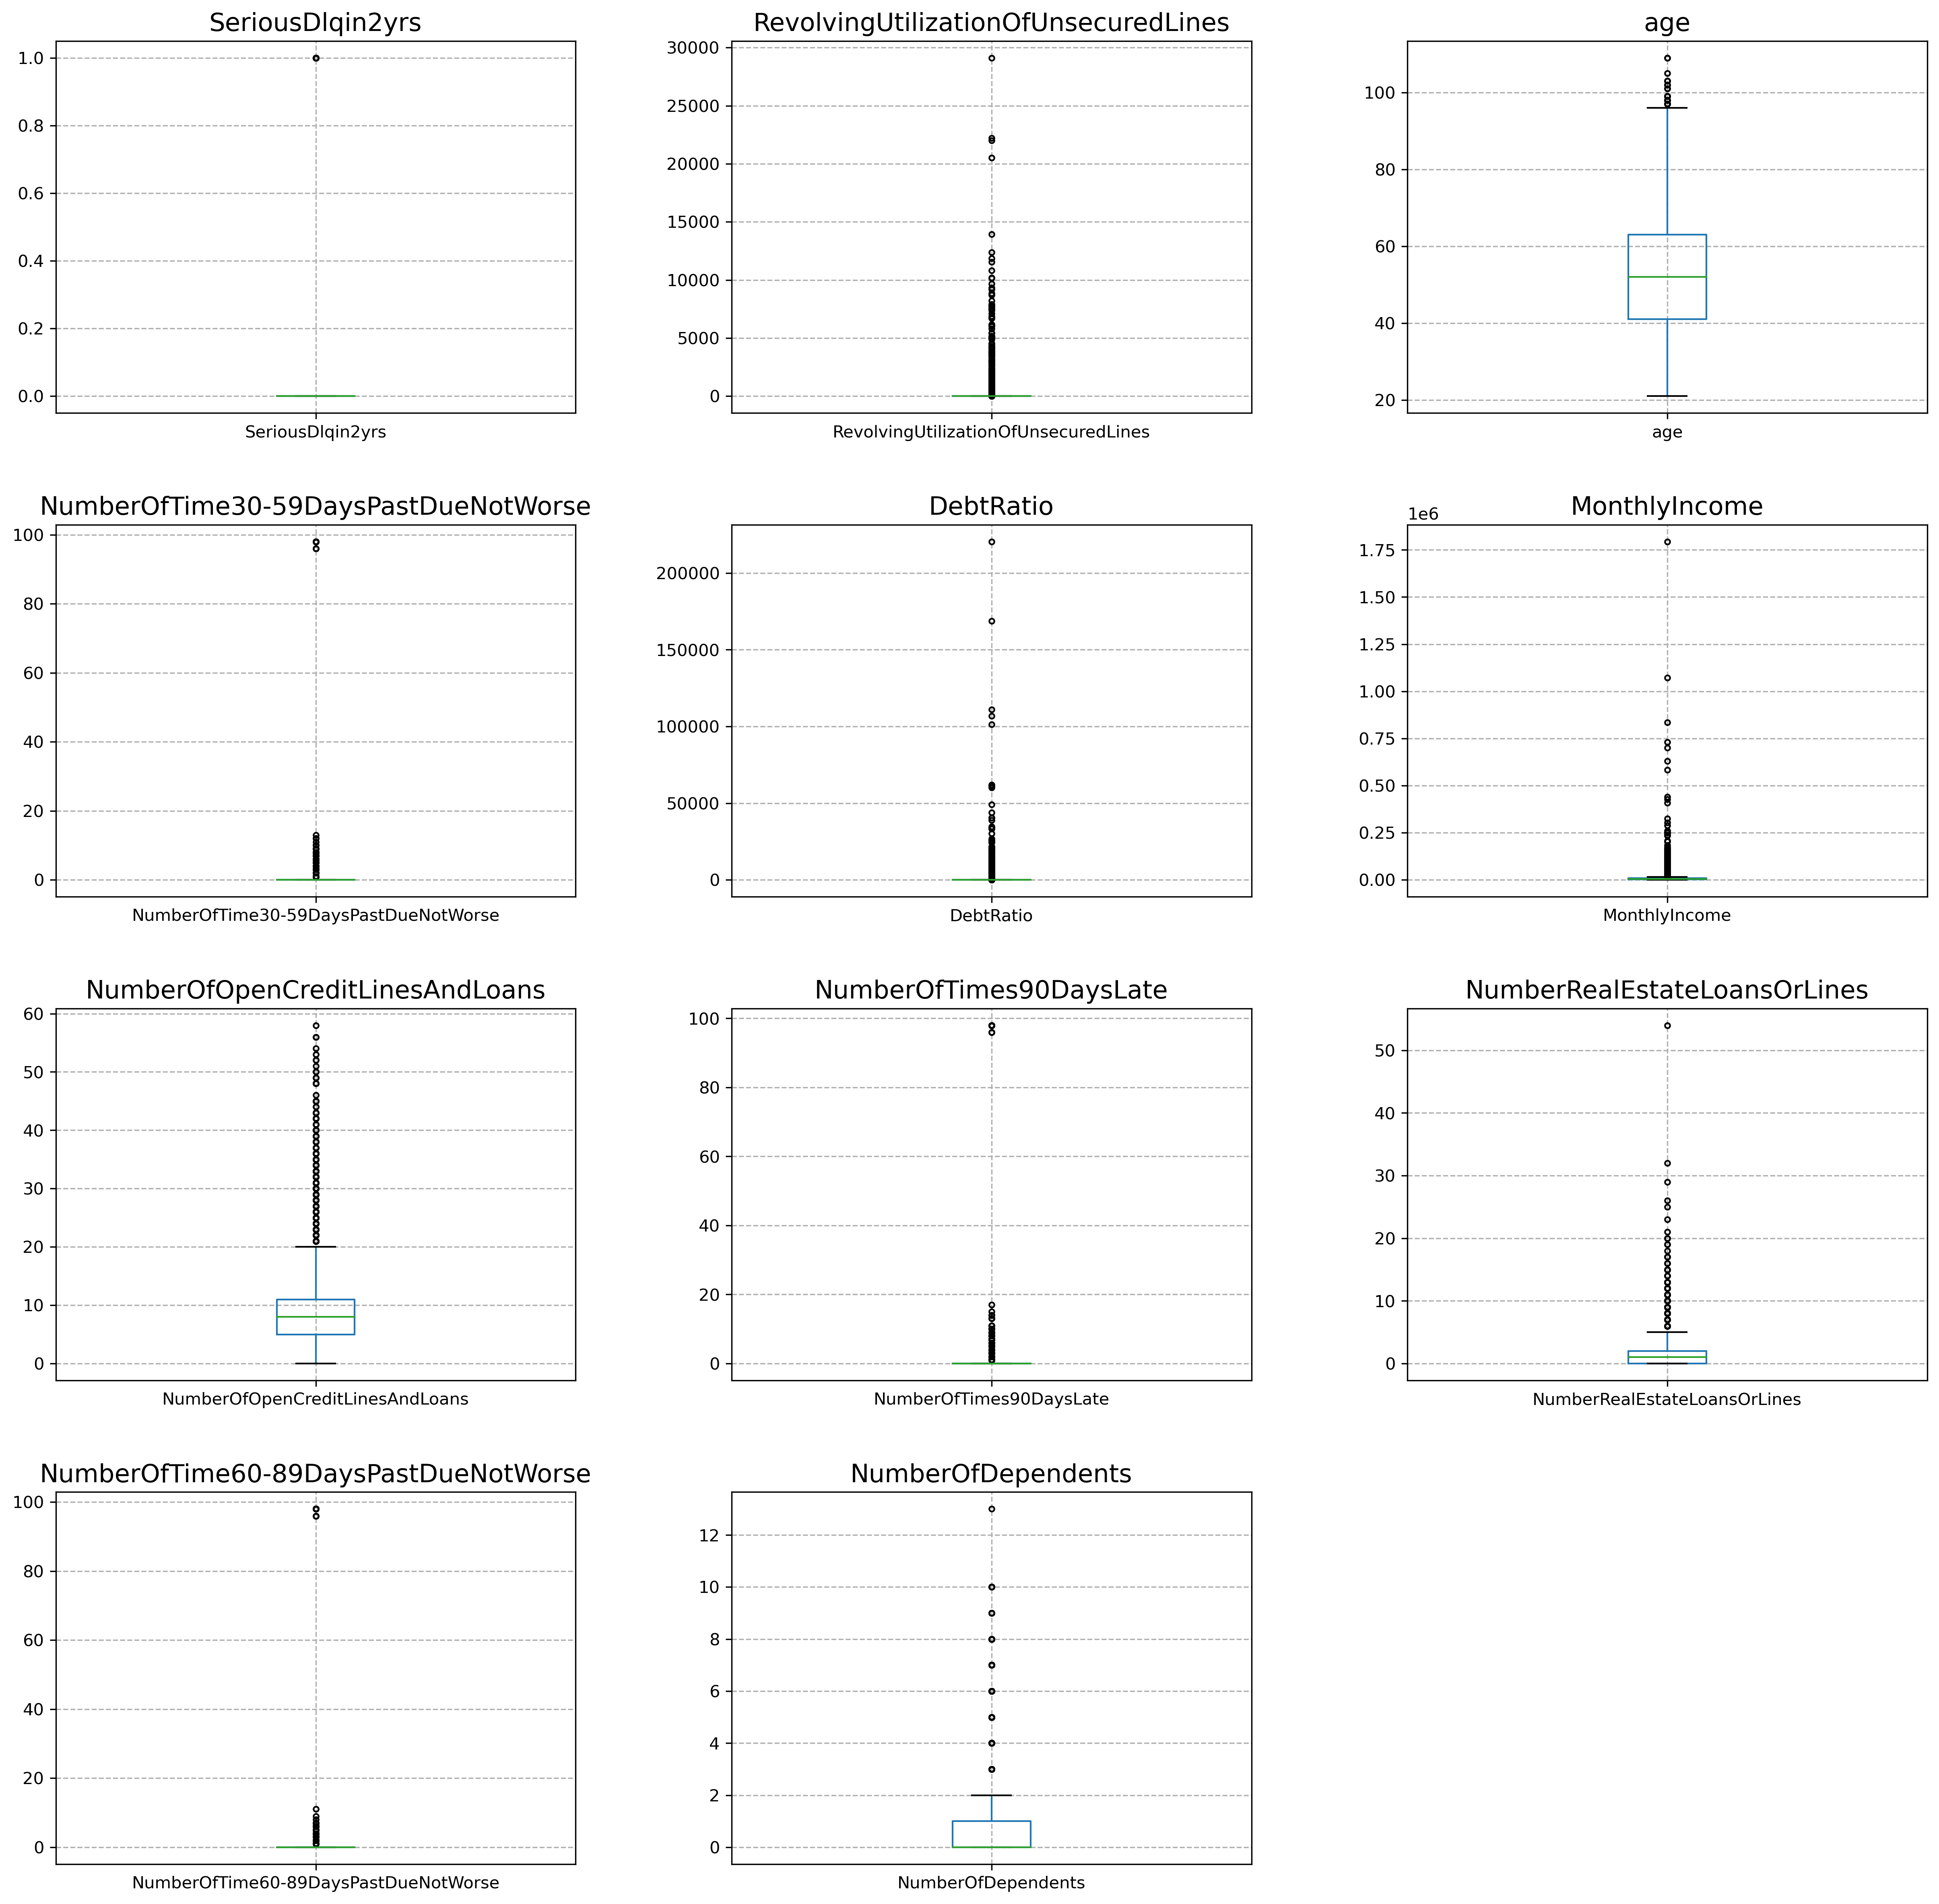

In [10]:
# 通过箱型图观察各字段异常情况
# DebtRatio异常值（错误）较多；RevolvingUtilizationOfUnsecuredLines 异常值（错误）较多，理论应小于或等于1
#  'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome','NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'异常值非常多，难以观察数据分布。
# age方面异常值有待观察
plt.figure(figsize=(20,20),dpi=300)
plt.subplots_adjust(wspace =0.3, hspace =0.3)
for n,i in enumerate(train.columns):
    plt.subplot(4,3,n+1)
    plt.title(i,fontsize=15)
    plt.grid(linestyle='--')
    train[[i]].boxplot(sym='.')

<AxesSubplot:>

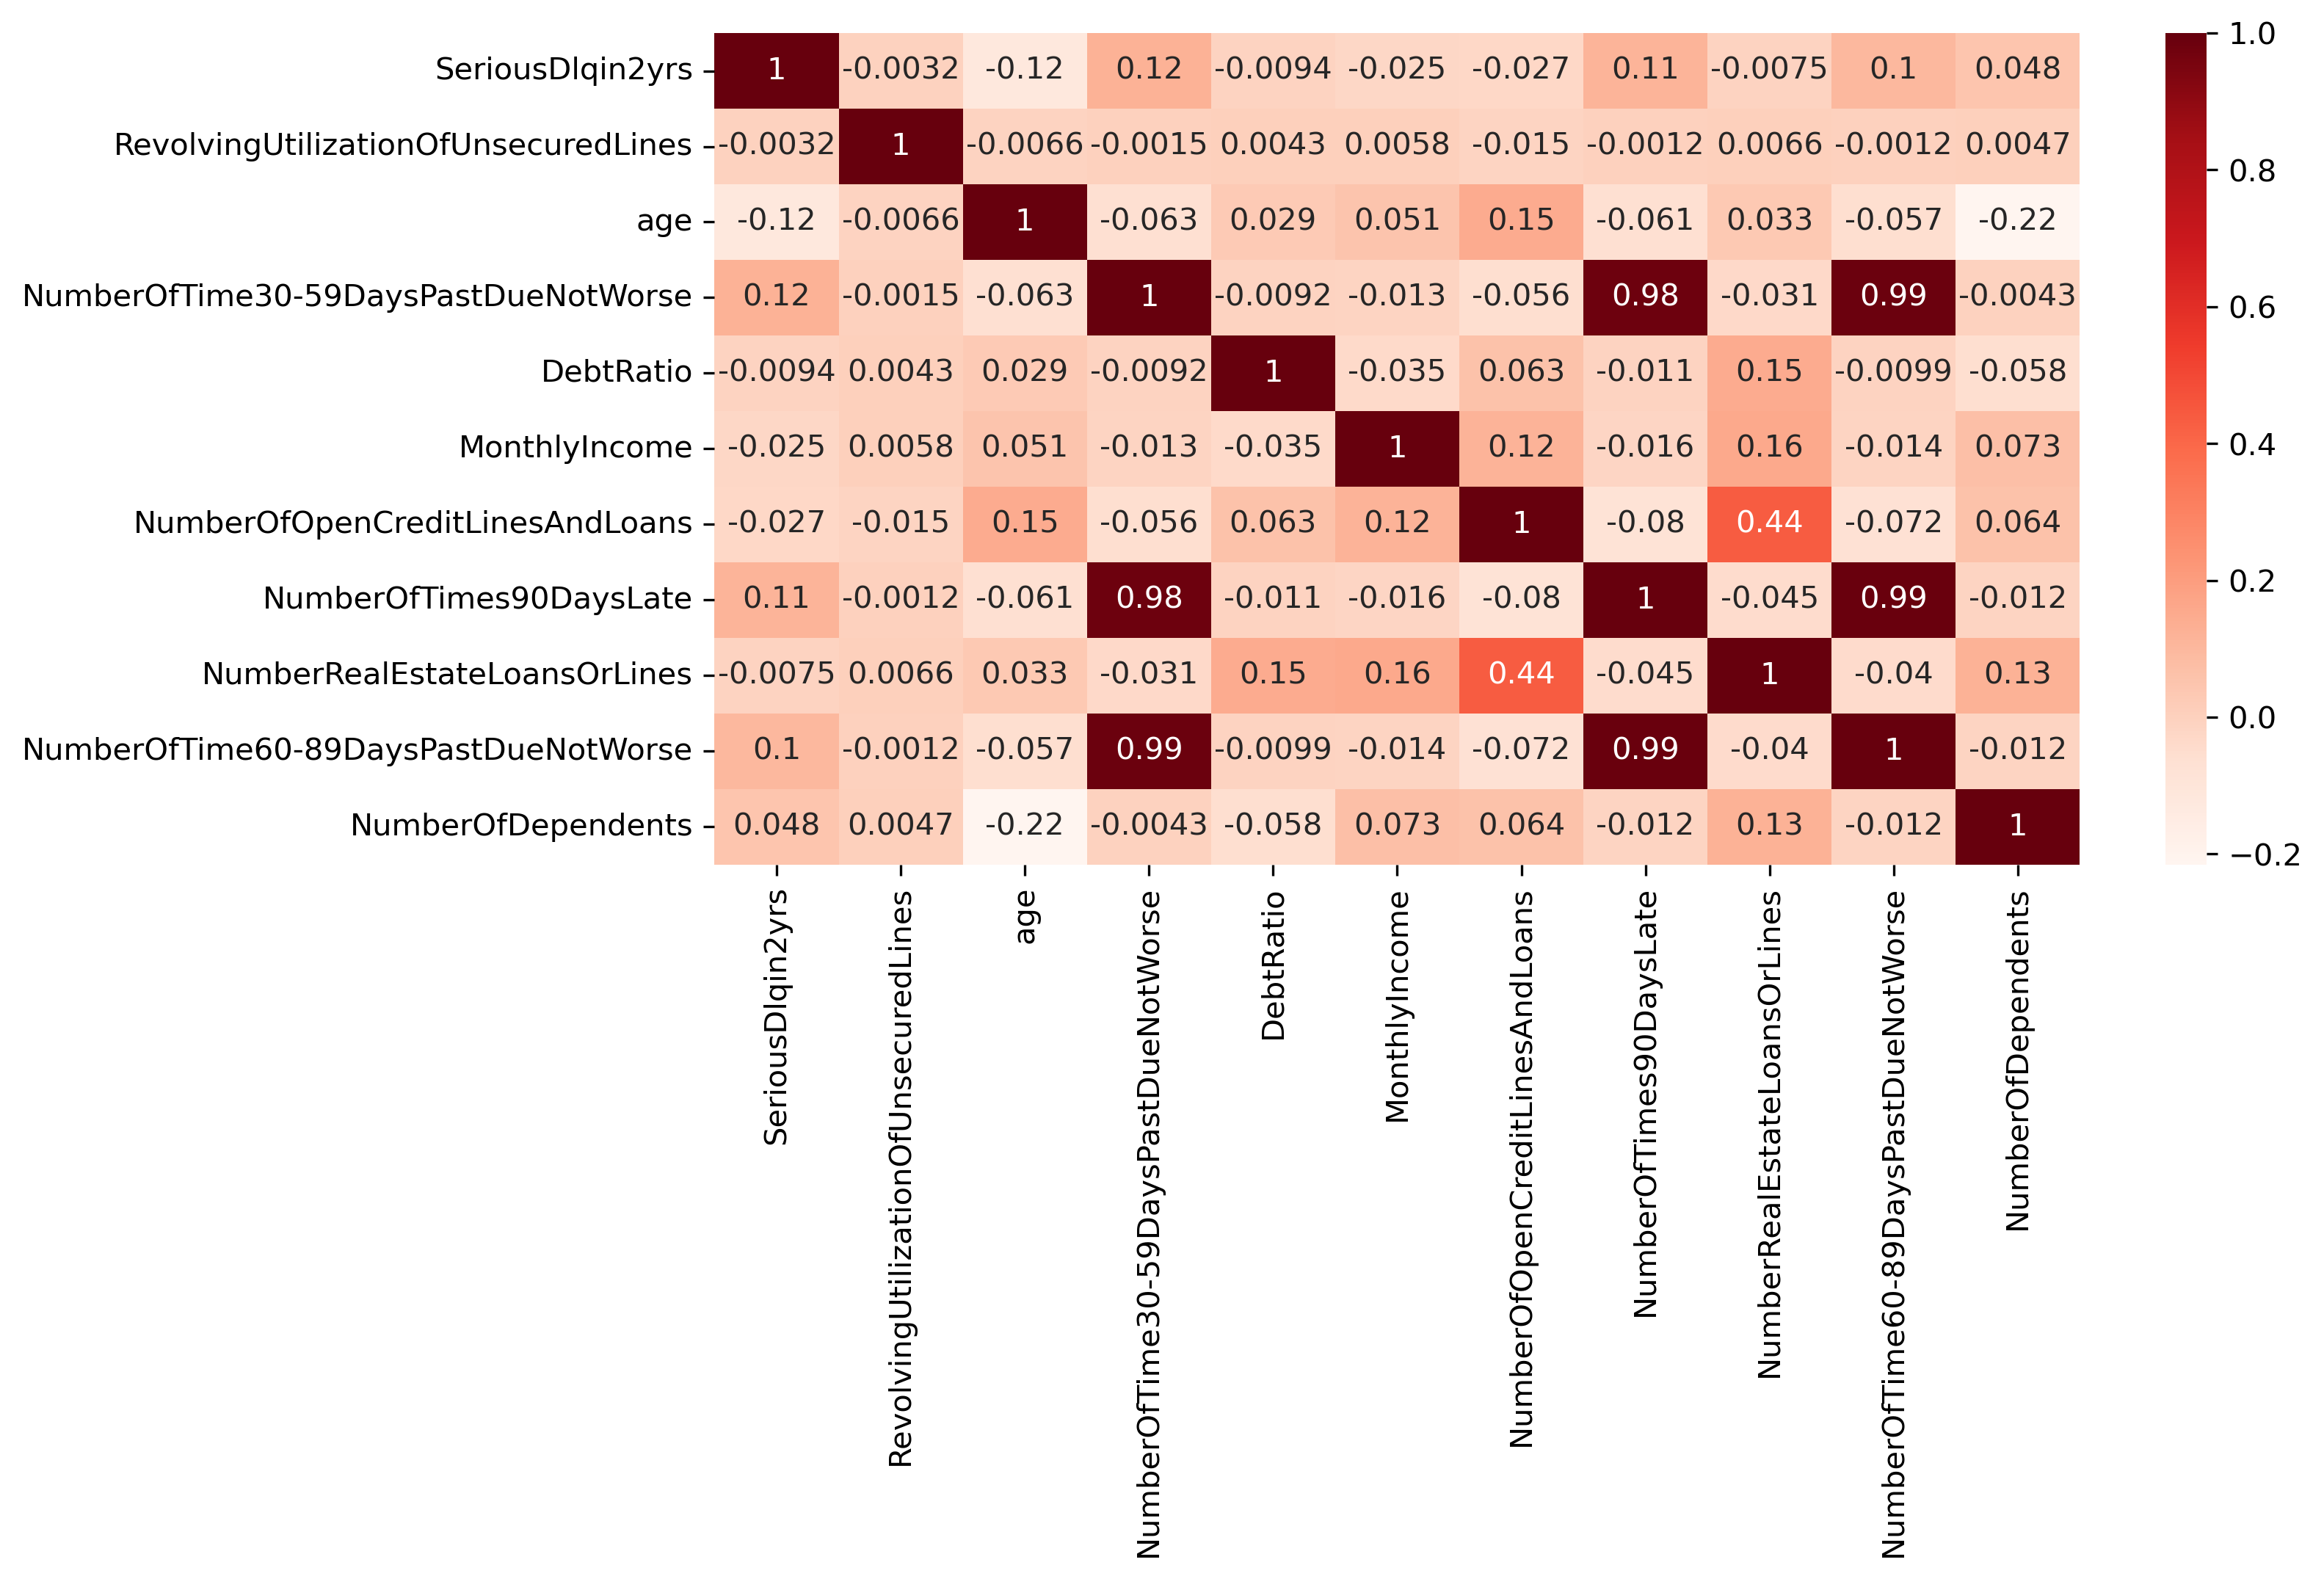

In [11]:
# 由图可知，逾期笔数这三个字段，共线性极高，可考虑去除共线性
plt.figure(figsize=(10,5),dpi=300)
sns.heatmap(train.corr(),cmap='Reds',annot=True)

In [12]:
def error_processing(df):
    '''
    异常值处理，可根据建模效果，反复调节处理方案，建议谨慎删除数据。
    df：数据源
    '''
    def show_error(df,col,whis=1.5,show=False):
        '''
        显示上下限异常值数量，可选显示示例异常数据
        df：数据源
        col：字段名
        whis：默认1.5，对应1.5倍iqr
        show：是否显示示例异常数据
        '''
        iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
        upper_bound = df[col].quantile(0.75) + whis * iqr # 上界
        lower_bound = df[col].quantile(0.25) - whis * iqr # 下界
        # print(iqr,upper_bound,lower_bound)
        print('【',col,'】上界异常值总数：',df[col][df[col] > upper_bound].count())
        if show:
            print('异常值示例：\n',df[df[col] > upper_bound].head(5).T)
        print('【',col,'】下界异常值总数：',df[col][df[col] < lower_bound].count())
        if show:
            print('异常值示例：\n',df[df[col] < lower_bound].head(5).T)
        print('- - - - - - ')

    def drop_error(df,col):
        '''
        删除上下限异常值数量
        df：数据源
        col：字段名
        '''
        iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
        upper_bound = df[col].quantile(0.75) + 1.5*iqr # 上界
        lower_bound = df[col].quantile(0.25) - 1.5*iqr # 下界
        data_del = df[col][(df[col] > upper_bound) | (df[col] < lower_bound)].count()
        data = df[(df[col] <= upper_bound) & (df[col] >= lower_bound)]
        # print('总剔除数据量：',data_del)
        return data
    
    # 计数器
    n = len(df)
    
    # 可用信贷额度
    # 从分布直方图可知，比例大于1的应该为错误值。
    # 错误值共3321，若剔除可能影响建模效果。剔除>=20000的数据
    show_error(df,'RevolvingUtilizationOfUnsecuredLines')
    df = df[df.RevolvingUtilizationOfUnsecuredLines<=20000]

    # age
    # 异常值数量不多，剔除age大于100小于18的异常数据
    show_error(df,'age')
    df = df[(df['age']>18) & (df['age']<100)]

    # NumberOfTime30-59DaysPastDueNotWorse
    # 根据箱型图去除>80的异常数据
    show_error(df,'NumberOfTime30-59DaysPastDueNotWorse')
    df = df[df['NumberOfTime30-59DaysPastDueNotWorse']<80]

    # NumberOfTimes90DaysLate
    # 根据箱型图去除>80的异常数据
    show_error(df,'NumberOfTimes90DaysLate')
    df = df[df['NumberOfTimes90DaysLate']<80]

    # NumberOfTime60-89DaysPastDueNotWorse
    # 根据箱型图去除>80的异常数据
    show_error(df,'NumberOfTime60-89DaysPastDueNotWorse')
    df = df[df['NumberOfTime60-89DaysPastDueNotWorse']<80]

    # DebtRatio
    # 根据箱型图去除>100000的异常数据
    show_error(df,'DebtRatio')
    df = df[df['DebtRatio']<100000]

    # MonthlyIncome
    # 根据箱型图去除>500000的异常数据
    show_error(df,'MonthlyIncome')
    df = df[(df['MonthlyIncome']<500000) | df.MonthlyIncome.isna()]

    # NumberRealEstateLoansOrLines
    # 根据箱型图去除>20的异常数据
    show_error(df,'NumberRealEstateLoansOrLines')
    df = df[df['NumberRealEstateLoansOrLines']<20]

    # NumberOfDependents
    # 根据箱型图去除>10的异常数据
    show_error(df,'NumberOfDependents')
    df = df[(df['NumberOfDependents']<12)|df.NumberOfDependents.isna()]

    # NumberOfOpenCreditLinesAndLoans - 保留异常值
    
    print('共删除数据 ',n - len(df),' 条。')


In [13]:
# 3种违约情况，从上节的相关系数热力图中，可以看出有很高的共线性
# 可考虑保留'NumberOfTimes90DaysLate'，求出'NumberOfTime60-89DaysPastDueNotWorse'/'NumberOfTime30-59DaysPastDueNotWorse'的比值
def collineation_processing(df,col,col1,col2,name):
    '''
    去除共线性，保留一个字段，其他字段求比值
    df：数据源
    col：保留字段
    col1，col2：求比值字段
    name：新比值字段名称
    '''
    def trans2percent(row):
        if row[col2] == 0:
            return 0
        else:
            return row[col1] / row[col2]
    df[name] = df.apply(trans2percent,axis=1)
#     df[[name,col]].corr()
    
# collineation_processing(df,'NumberOfTimes90DaysLate'，'NumberOfTime60-89DaysPastDueNotWorse'，'NumberOfTime30-59DaysPastDueNotWorse'，'逾期60-89天/30-59天')

In [14]:
def missing_values_processing(df,func1=1,func2=1):
    '''
    缺失值处理
    df：数据源
    func1：默认为1，众数填充家属；0，去除带空值数据行。
    func2：默认为1，众数填充MonthlyIncome；0，平均数填充MonthlyIncome。
    '''
    # NumberOfDependents - 剔除或众数填充
    if func1 == 1:
        df.loc[df.NumberOfDependents.isna(),'NumberOfDependents'] = df.NumberOfDependents.mode()[0]
    elif func1 == 0:
        df = df.dropna(subset=['NumberOfDependents'])
    else:
        print('parameter wrong!')
    
    # MonthlyIncome - 剔除或均值填充
    if func1 == 1:
        df.loc[df.MonthlyIncome.isna(),'MonthlyIncome'] = df.MonthlyIncome.mode()[0]
    elif func1 == 0:    
        df.loc[df.MonthlyIncome.isna(),'MonthlyIncome'] = df.MonthlyIncome.mean()[0]
    else:
        print('parameter wrong!')

    # 可考虑建模填充 MonthlyIncome，构建回归模型性能查看函数（最终测试结果很不理想）
#     def perfomance_reg(model,X,y,name=None):
#         y_predict = model.predict(X)
#         check = pd.DataFrame(y)
#         check['y_predict'] = y_predict
#         check['abs_err'] = abs(check['y_predict'] - check[y.name] )
#         check['ape'] = check['abs_err'] / check[y.name]
#         ape = check['ape'][check['ape']!=np.inf].mean()
#         if name:
#             print(name,':')
#         print(f'mean squared error is: {mean_squared_error(y,y_predict)}')
#         print(f'mean absolute error is: {mean_absolute_error(y,y_predict)}')
#         print(f'R Squared is: {r2_score(y,y_predict)}')
#         print(f'mean absolute percent error is: {ape}')
#         print('- - - - - - ')
        
    # 线性回归填充MonthlyIncome,mae较大
#     train_x = df1[df1.MonthlyIncome.notna()].drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','MonthlyIncome'],axis=1)
#     train_y = df1[df1.MonthlyIncome.notna()].MonthlyIncome
#     test_x = df1[df1.MonthlyIncome.isna()].drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','MonthlyIncome'],axis=1)
#     pipe_lr = Pipeline([
#             ('sc',StandardScaler()),
#             ('pow_trans',PowerTransformer()),
#             ('rf',LinearRegression())
#             ])
#     pipe_lr.fit(train_x,train_y)
#     perfomance_reg(pipe_lr,train_x,train_y)
#     pipe_lr.predict(test_x)

    # 随机森林填充MonthlyIncome，表现较线性回归略好一点,但也很差
#     dd = df1[df1.MonthlyIncome.notna()].sample(n=5000)
#     train_x_sample = dd.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','MonthlyIncome'],axis=1)
#     train_y_sample = dd.MonthlyIncome
#     test_x_sample = df1[df1.MonthlyIncome.isna()].drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','MonthlyIncome'],axis=1)
#     pipe_rf = Pipeline([
#             ('sc',StandardScaler()),
#             ('pow_trans',PowerTransformer()),
#             ('rf',RandomForestRegressor(criterion='mae',n_estimators=200,verbose=1,n_jobs=-1))
#             ])
#     pipe_rf.fit(train_x_sample,train_y_sample)
#     perfomance_reg(pipe_rf,train_x_sample,train_y_sample)
#     df1.loc[df1.MonthlyIncome.isna(),'MonthlyIncome'] = pipe_rf.predict(test_x_sample)

In [15]:
# 从数据初探可以发现，'SeriousDlqin2yrs'标签类别分布不均，需对样本进行重取样
def resample(df):
    '''
    使样本'SeriousDlqin2yrs'标签的0，1项可以各占一半，以提高预测效果。sample()可以考虑添加random_state以便生成相同样本集
    df：数据源
    '''
    num = df['SeriousDlqin2yrs'].value_counts()[1]
    df_t = df[df.SeriousDlqin2yrs==1]
    df_f = df[df.SeriousDlqin2yrs==0].sample(frac=1)[0:num]
    df_balanced = pd.concat([df_t,df_f]).sample(frac=1).reset_index(drop=True)
#     print(df_balanced.SeriousDlqin2yrs.value_counts())
    return df_balanced

In [16]:
# 设 【 df1 】 为违约概率模型建模所用数据集
df1 = train.copy()

# 异常处理
error_processing(df1)
# 去除共线性
collineation_processing(df1,'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse/NumberOfTime30-59DaysPastDueNotWorse')
# 缺失值处理
missing_values_processing(df1,func1=1,func2=1)
# 数据重采样
df_balanced = resample(df1)

# 最后将数据集划分成训练集和验证集，两者划分比例都为8：2
# 可考虑删去的列：'NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse/NumberOfTime30-59DaysPastDueNotWorse','SeriousDlqin2yrs'
X = df_balanced.drop(['SeriousDlqin2yrs','NumberOfTime60-89DaysPastDueNotWorse/NumberOfTime30-59DaysPastDueNotWorse'],axis=1) 
y = df_balanced['SeriousDlqin2yrs']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)    # random_state=42

# 分层k折交叉拆分器 - 用于网格搜索
cv = StratifiedKFold(n_splits=3,shuffle=True)

【 RevolvingUtilizationOfUnsecuredLines 】上界异常值总数： 560
【 RevolvingUtilizationOfUnsecuredLines 】下界异常值总数： 0
- - - - - - 
【 age 】上界异常值总数： 34
【 age 】下界异常值总数： 0
- - - - - - 
【 NumberOfTime30-59DaysPastDueNotWorse 】上界异常值总数： 17963
【 NumberOfTime30-59DaysPastDueNotWorse 】下界异常值总数： 0
- - - - - - 
【 NumberOfTimes90DaysLate 】上界异常值总数： 6009
【 NumberOfTimes90DaysLate 】下界异常值总数： 0
- - - - - - 
【 NumberOfTime60-89DaysPastDueNotWorse 】上界异常值总数： 5482
【 NumberOfTime60-89DaysPastDueNotWorse 】下界异常值总数： 0
- - - - - - 
【 DebtRatio 】上界异常值总数： 23507
【 DebtRatio 】下界异常值总数： 0
- - - - - - 
【 MonthlyIncome 】上界异常值总数： 3656
【 MonthlyIncome 】下界异常值总数： 0
- - - - - - 
【 NumberRealEstateLoansOrLines 】上界异常值总数： 592
【 NumberRealEstateLoansOrLines 】下界异常值总数： 0
- - - - - - 
【 NumberOfDependents 】上界异常值总数： 9983
【 NumberOfDependents 】下界异常值总数： 0
- - - - - - 
共删除数据  241  条。


In [17]:
# 分类模型性能查看函数
def perfomance_clf(model,X,y,name=None):
    y_predict = model.predict(X)
    if name:
        print(name,':')
    print(f'accuracy score is: {accuracy_score(y,y_predict)}')
    print(f'precision score is: {precision_score(y,y_predict)}')
    print(f'recall score is: {recall_score(y,y_predict)}')
    print(f'auc: {roc_auc_score(y,y_predict)}')
    print('- - - - - - ')

In [18]:
#逻辑回归模型

In [19]:
# 参数设定
log_params = {"penalty":['l1','l2'],
                 'C':[0.001*10**i for i in range(0,7)]}
# 参数搜索
log_gridsearch = GridSearchCV(LogisticRegression(solver='liblinear'),log_params,cv=cv,
                               n_jobs=-1,scoring='roc_auc',verbose=2,refit=True)
# 工作流管道
pipe_log = Pipeline([
        ('sc',StandardScaler()),    # 标准化Z-score
        ('pow_trans',PowerTransformer()),    # 纠偏
        ('log_grid',log_gridsearch)
        ])
# 搜索参数并训练模型
pipe_log.fit(xtrain,ytrain)
# 最佳参数组合
print(pipe_log.named_steps['log_grid'].best_params_)
# 训练集性能指标
perfomance_clf(pipe_log,xtrain,ytrain,name='train')
# 测试集性能指标
perfomance_clf(pipe_log,xtest,ytest,name='test')

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'C': 0.1, 'penalty': 'l1'}
train :
accuracy score is: 0.7774380165289256
precision score is: 0.8044813877846043
recall score is: 0.7342899554675903
auc: 0.7775309310218522
- - - - - - 
test :
accuracy score is: 0.7782551222736286
precision score is: 0.8041085840058694
recall score is: 0.7306666666666667
auc: 0.7778497160332023
- - - - - - 


In [20]:
# 交叉验证查看平均分数
cross_val_score(pipe_log,xtrain,ytrain,cv=3,scoring='roc_auc').mean()

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 3 folds for each of 14 candidates, totalling 42 fits


0.857317908879273

In [21]:
#随机森林分类模型

In [22]:
# 随机森林分类模型
rf_clf = RandomForestClassifier(criterion='gini',
                               n_jobs=-1,
                               n_estimators=1000)    # random_state
# 参数设定
rf_grid_params = {'max_features':['auto'],    # ['auto',0.5,0.6,0.9] 未知最优参数时可以自己设定组合
                    'max_depth':[6,9]}    # [3,6,9]
# 参数搜索
rf_gridsearch = GridSearchCV(rf_clf,rf_grid_params,cv=cv,
                               n_jobs=-1,scoring='roc_auc',verbose=10,refit=True)
# 工作流管道
pipe_rf = Pipeline([
        ('sc',StandardScaler()),
        ('pow_trans',PowerTransformer()),
        ('rf_grid',rf_gridsearch)
        ])
# 搜索参数并训练模型
pipe_rf.fit(xtrain,ytrain)
# 最佳参数组合
print(pipe_rf.named_steps['rf_grid'].best_params_)
# 训练集性能指标
perfomance_clf(pipe_rf,xtrain,ytrain,name='train')
# 测试集性能指标
perfomance_clf(pipe_rf,xtest,ytest,name='test')

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'max_depth': 9, 'max_features': 'auto'}
train :
accuracy score is: 0.8213223140495868
precision score is: 0.8283117320316445
recall score is: 0.8116444004618176
auc: 0.8213431543471917
- - - - - - 
test :
accuracy score is: 0.7842035690680766
precision score is: 0.7825216811207472
recall score is: 0.782
auc: 0.7841847968545216
- - - - - - 


In [23]:
# 注意！！！交叉验证查看平均分数（由于管道会反复搜索参数，会较耗时）
cross_val_score(pipe_rf,xtrain,ytrain,cv=3,scoring='roc_auc').mean()

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits


0.862174232654652

In [24]:
#xgboost模型

In [25]:
# xgboost模型
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                            n_job=-1,
                            booster='gbtree',
                            n_estimators=1000,
                            learning_rate=0.01,
                            use_label_encoder=False,
                            eval_metric='auc'
                            )
# 参数设定
xgb_params = {'max_depth':[6,9],    # 注意参数设置，数量多了会更加耗时
             'subsample':[0.6,0.9],
             'colsample_bytree':[0.5,0.6],
             'reg_alpha':[0.05,0.1]}
# 参数搜索
xgb_gridsearch = GridSearchCV(xgb_clf,xgb_params,cv=cv,n_jobs=-1,
                                 scoring='roc_auc',verbose=10,refit=True)
# 工作流管道
pipe_xgb = Pipeline([
    ('sc',StandardScaler()),
    ('pow_trans',PowerTransformer()),
    ('xgb_grid',xgb_gridsearch)
])
# 搜索参数并训练模型
pipe_xgb.fit(xtrain,ytrain)
# 最佳参数组合
print(pipe_xgb.named_steps['xgb_grid'].best_params_)
# 训练集性能指标
perfomance_clf(pipe_xgb,xtrain,ytrain,name='train')
# 测试集性能指标
perfomance_clf(pipe_xgb,xtest,ytest,name='test')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[19:15:27] WARNING: ../src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'colsample_bytree': 0.5, 'max_depth': 6, 'reg_alpha': 0.05, 'subsample': 0.6}
train :
accuracy score is: 0.8318181818181818
precision score is: 0.8402027027027027
recall score is: 0.8203859475507175
auc: 0.8318427998479113
- - - - - - 
test :
accuracy score is: 0.7911434236615995
precision score is: 0.7956403269754768
recall score is: 0.7786666666666666
auc: 0.7910371341197029
- - - - - - 


In [26]:
# 注意！！！交叉验证查看平均分数（由于管道会反复搜索参数，会很耗时）
cross_val_score(pipe_xgb,xtrain,ytrain,cv=3,scoring='roc_auc').mean()

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END .................................C=10.0, penalty=l1; total time=   0.0s
[CV] END .................................C=10.0, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ...............................C=1000.0, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0

[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END .................................C=10.0, penalty=l1; total time=   0.0s
[CV] END .................................C=10.0, penalty=l2; total time=   0.0s
[CV] END ...............................C=1000.0, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ...................

[19:54:37] WARNING: ../src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ...............................C=1000.0, penalty=l2; total time=   0.0s
[CV] END ................................C=100.0, penalty=l1; total time=   0.0s
[CV] END ...............................C=1000.0, penalty=l1; total time=   0.0s
[CV] END .......

[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END .................................C=10.0, penalty=l1; total time=   0.0s
[CV] END ................................C=100.0, penalty=l1; total time=   0.0s
[CV] END ................................C=100.0, penalty=l2; total time=   0.0s
[CV] END ...............................C=1000.0, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ...................

[20:40:31] WARNING: ../src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/3; 3/16] START colsample_bytree=0.5, max_depth=6, reg_alpha=0.1, subsample=0.6
[19:55:50] WARNING: ../src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/3; 3/16] END colsample_bytree=0.5, max_depth=6, reg_alpha=0.1, subsample=0.6;, score=0.860 total time=  26.5s
[CV 3/3; 5/16] START colsample_bytree=0.5, max_depth=9, reg_alpha=0.05, subsample=0.6
[

[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END .................................C=10.0, penalty=l2; total time=   0.0s
[CV] END ................................C=100.0, penalty=l1; total time=   0.0s
[CV] END ...............................C=1000.0, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ...................

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[03:00:52] WARNING: ../src/learner.cc:576: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.8630416123940531

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

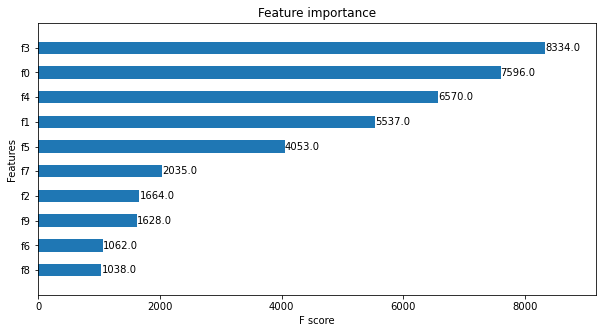

In [27]:
# 查看字段相对xgboost模型的重要程度
# 一般显示 ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'] 这些字段比较重要
plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
xgb.plot_importance(pipe_xgb.named_steps['xgb_grid'].best_estimator_,
                       max_num_features=40,height=0.5,grid=False,ax=ax)
xtrain.columns

In [28]:
# 预测集数据读取与处理
dftest = pd.read_csv("//Users/hezheng/Downloads/ConsumerCredit/ConsumerCred-test.csv",sep = ",")
dftest.loc[dftest.NumberOfDependents.isna(),'NumberOfDependents'] = df1.NumberOfDependents.mode()[0]
dftest.loc[dftest.MonthlyIncome.isna(),'MonthlyIncome'] = df1.MonthlyIncome.mode()[0]

In [29]:
# 以xgboost模型预测，生成csv结果文件
result = pipe_xgb.predict_proba(dftest.drop('id',axis=1))
print(result)
result_ = [[n+1,i] for n,i in enumerate(result[:,1])]
print(result)
df_result = pd.DataFrame(result_,columns=['Id','Probability'])
print(dfresult)
df_result.to_csv('sampleEntry.csv',index=False)

[[0.8582461  0.14175393]
 [0.8663844  0.13361561]
 [0.44490314 0.55509686]
 ...
 [0.4030983  0.5969017 ]
 [0.6101848  0.38981524]
 [0.76430416 0.23569581]]
[[0.8582461  0.14175393]
 [0.8663844  0.13361561]
 [0.44490314 0.55509686]
 ...
 [0.4030983  0.5969017 ]
 [0.6101848  0.38981524]
 [0.76430416 0.23569581]]


NameError: name 'dfresult' is not defined